# Using analytics to aid in audit planning
![](2023-01-04-11-34-44.png)
# Objectives:
1. Explore Singapore Airlines Half Yearly Annual Report 2022/2023
2. Identify areas of interest for audit based on audit risk assessment
3. Use data analysis to anomalies in the data 

In [29]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Exploring SIA's Half Yearly Report

In [30]:
# read data
profitloss = pd.read_excel('SIA_BS_firsthalf.xlsx', sheet_name='PL formatted')
balancesheet = pd.read_excel('SIA_BS_firsthalf.xlsx', sheet_name='BS Formatted')

In [31]:
profitloss.head()

,REVENUE,Staff Cost,Fuel Cost,Fuel hedging ineffectiveness,Depreciation,Amortisation of IA,Aircraft Maintenance and overhaul costs,Commission and incentives,"Landing, Parking, overflying charges",Hangling charges,...,Impairment of base maintenance assets,Surplus/Loss on disposal of aircraft or spares,Dividends from long term investments,other non operating items,share of profits of joint venture companies,share of losses of associated companies,Taxation,Currency Translation Differences,Net Fair Value Changes CFH,Share of OCI and JV companies
0,8416.5,1359.7,2695.9,-0.5,987.4,37.5,225.7,237.7,306.8,437.7,...,0,2.5,4,-3.1,17.2,-79.6,-150.5,45.0,-191.9,-7.4
1,2826.9,663.7,810.2,-78.8,955.7,34.8,211.6,21.2,192.0,282.1,...,0,12.8,4,-63.0,5.6,-113.5,116.0,8.8,676.9,-0.6


In [32]:

balancesheet.head()

,PPE,ROU Asset,Intangible Assets,Subsidiary Companies,Associated Companies,JV Companies,Long term investments,Other long term assets,Derivative assets,Inventories,...,Sales in advance of carriage,Deferred revenue,Deferred account,Derivative liabilities,Provisions.1,Share capital,Mandatory Convertible Bonds,Treasury shares,Other reserves,NCI
0,24969.7,3153.1,309.1,0,744.9,258.0,39.1,1135.9,842.8,209.1,...,4160.9,872.2,16.2,299.0,195.5,7180.2,9691.2,-73.8,6389.2,405.3
1,24570.6,3290.1,303.2,0,805.8,233.4,42.6,1737.2,1402.0,187.4,...,2107.8,925.7,15.9,574.7,183.4,7180.2,9691.2,-106.5,5647.0,388.5


In [33]:
# Find top 10 columns with greatest average absolute value
profitloss.abs().mean().sort_values(ascending=False).head(10)

REVENUE                                    5621.70
Fuel Cost                                  1753.05
Staff Cost                                 1011.70
Depreciation                                971.55
Net Fair Value Changes CFH                  434.40
Hangling charges                            359.90
other operating expenses                    326.00
Landing, Parking, overflying charges        249.40
Aircraft Maintenance and overhaul costs     218.65
Finance Charges                             200.75
dtype: float64

In [34]:
balancesheet.abs().mean().sort_values(ascending=False).head(10)

PPE                             24770.15
Cash and Bank Balances          15606.55
Other long term liabilities     10865.45
Mandatory Convertible Bonds      9691.20
Share capital                    7180.20
Other reserves                   6018.10
ROU Asset                        3221.60
Borrowings                       3142.20
Sales in advance of carriage     3134.35
Trade and other creditors        3095.50
dtype: float64

<AxesSubplot: title={'center': 'Top 10 Balance sheet line items with greatest average absolute value'}>

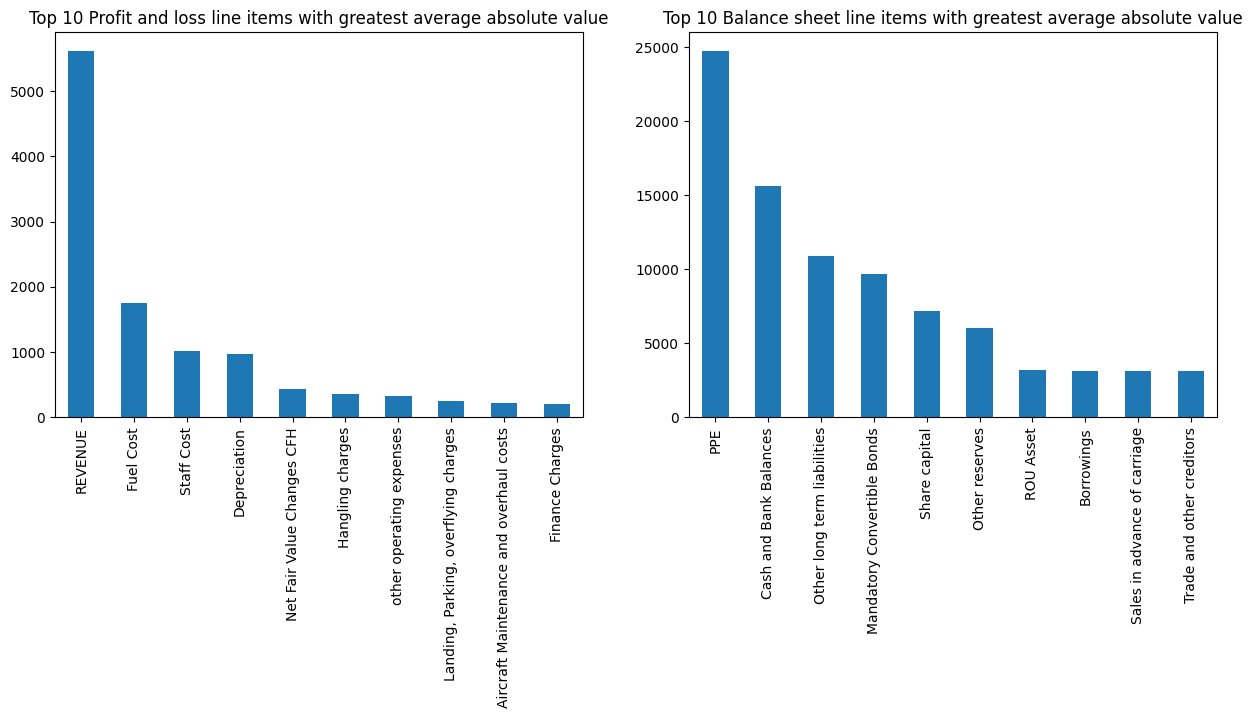

In [35]:
# plotting both profit and loss and balance sheet
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# plot the top 10 columns with greatest average absolute value
profitloss.abs().mean().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Profit and loss line items with greatest average absolute value', ax=axes[0])
balancesheet.abs().mean().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Balance sheet line items with greatest average absolute value', ax=axes[1])


In [36]:
# Find top 10 columns with greatest difference between first and second half
(profitloss.iloc[0] - profitloss.iloc[1]).abs().sort_values(ascending=False).head(10)

REVENUE                       5589.6
Fuel Cost                     1885.7
Net Fair Value Changes CFH     868.8
Staff Cost                     696.0
Taxation                       266.5
Commission and incentives      216.5
other operating expenses       176.0
Inflight Meals                 168.6
Hangling charges               155.6
Advertising and sales cost     115.0
dtype: float64

In [37]:
# Find top 10 columns with greatest difference between first and second half
(balancesheet.iloc[0] - balancesheet.iloc[1]).abs().sort_values(ascending=False).head(10)

Cash and Bank Balances          3687.7
Sales in advance of carriage    2053.1
Other long term liabilities     1080.1
Borrowings.1                    1067.0
Other reserves                   742.2
Trade and other creditors        724.4
Provisions                       609.4
Other long term assets           601.3
Derivative assets                559.2
PPE                              399.1
dtype: float64

<AxesSubplot: title={'center': 'Top 10 Balance sheet line items with greatest variance between first and second half'}>

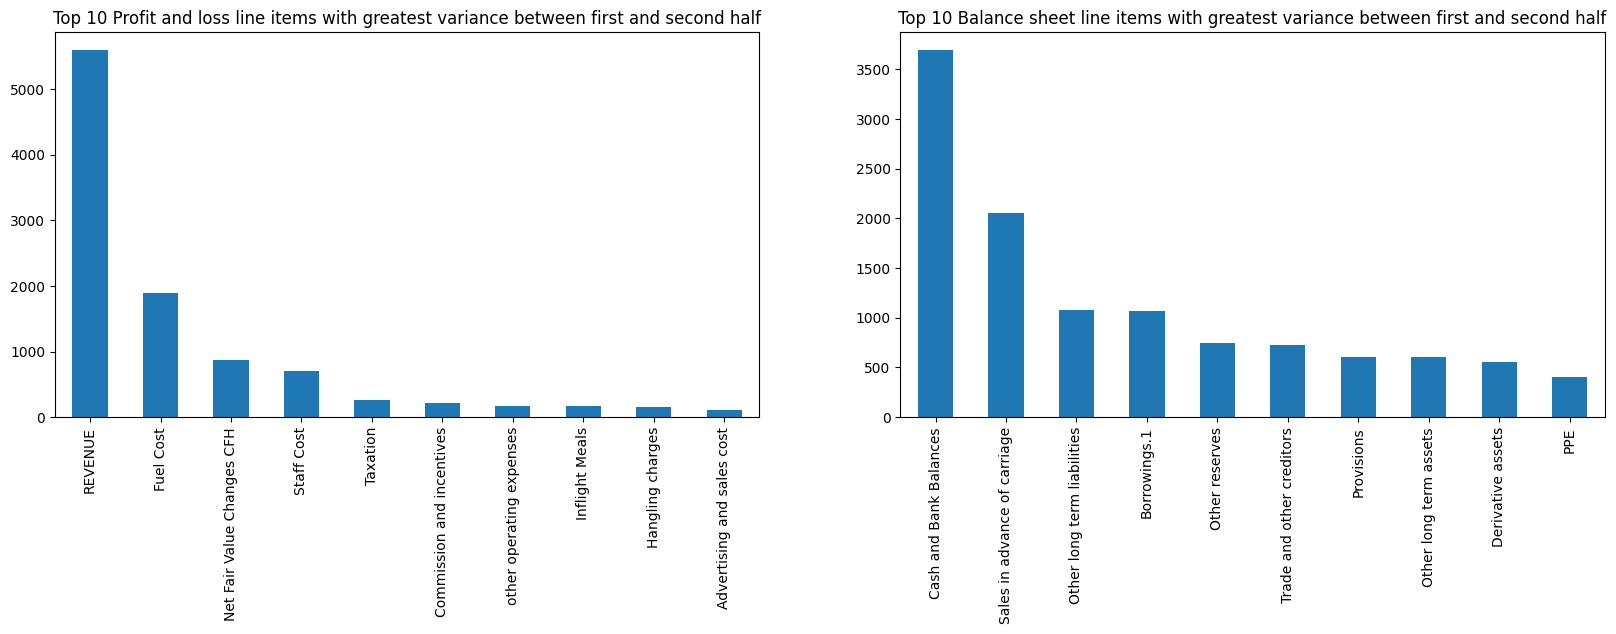

In [38]:
# plotting both profit and loss and balance sheet
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
# plot the top 10 columns with greatest difference between first and second half
(profitloss.iloc[0] - profitloss.iloc[1]).abs().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Profit and loss line items with greatest variance between first and second half', ax=axes[0])
(balancesheet.iloc[0] - balancesheet.iloc[1]).abs().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Balance sheet line items with greatest variance between first and second half', ax=axes[1])

# Step 2: Identifying areas of Interest:
- Revenue, Cash and Bank Balances, PPE, and Leases are key areas of interests for audit based on size and materiality
- For this analysis, we will focus on Cash and Bank Balances as it shows both a high volume and variance in the data
- Cash and Bank Balances also hold a significant inherent risk which is a key factor in audit planning

## About the Data:
- The data is a sample of SAP 12month General Ledger data from Kaggle with 333,555 rows and 18 columns 
- We will be looking into the Cash and Bank Balances account for the year 2015/2016 of the dataset

In [39]:
GL = pd.read_excel('General_Ledger.xlsx')

GL.columns.unique()

Index(['Account', 'Account Description', 'Product', 'Period Name', 'Name',
       'Description', 'Customer/Vendor', 'Reference 1', 'Entered Currency',
       'Entered Amount', 'Fx Currency', 'Fx Amount', 'Je Category',
       'Je Line Num', 'Effective Date', 'Date Created', 'BLOCKed Date',
       'Doc Sequence'],
      dtype='object')

In [40]:
GL.shape

(33355, 18)

In [41]:
GL.head()

,Account,Account Description,Product,Period Name,Name,Description,Customer/Vendor,Reference 1,Entered Currency,Entered Amount,Fx Currency,Fx Amount,Je Category,Je Line Num,Effective Date,Date Created,BLOCKed Date,Doc Sequence
0,20600,Computer Hardware,0,JAN-15,JAN-15 Addition SGD,Journal Import Created,NaN,NaN,SGD,37374.10,SGD,37374.10,Addition,1.0,2015-01-31,2015-02-02,2015-02-02 00:00:00,21002.0
1,20999,Fixed Assets Clearing Account,0,JAN-15,AL- RECLASS- SJDJDJ #I15010600055- Okus SUPPORT,RECLASS- SJDJDJ #I15010600055- Okus SUPPORT,NaN,NaN,SGD,-13886.10,SGD,-13886.10,All manual journal,1.0,2015-01-31,2015-02-02,2015-03-02 00:00:00,21011.0
2,20999,Fixed Assets Clearing Account,0,JAN-15,AL- RECLASS- SJDJDJ #I15010600055- Okus SUPPORT,RECLASS- SJDJDJ #I15010600055- Okus SUPPORT- U...,NaN,NaN,SGD,-18543.49,SGD,-18543.49,All manual journal,4.0,2015-01-31,2015-02-03,2015-03-02 00:00:00,21042.0
3,20999,Fixed Assets Clearing Account,0,JAN-15,AL- RECLASS- SJDJDJ #I15010600055- Okus SUPPORT,RECLASS- SJDJDJ #I15010600055- Okus SUPPORT- W...,NaN,NaN,SGD,13886.10,SGD,13886.10,All manual journal,1.0,2015-01-31,2015-02-03,2015-03-02 00:00:00,21042.0
4,20999,Fixed Assets Clearing Account,0,JAN-15,JAN-15 Addition SGD,Journal Import Created,NaN,NaN,SGD,-37374.10,SGD,-37374.10,Addition,2.0,2015-01-31,2015-02-02,2015-02-02 00:00:00,21002.0


In [42]:
GL['Account Description'].value_counts()

Accounts Payable                           4594
Accrued Space Acquisition                  3922
Business Taxes                             2660
RURALBANK S$                               1793
Deferred SS1 Revenue Current               1019
Other Employee Expense                      862
Telephone                                   850
Workman Comp                                842
Current Deferred PMT                        754
Accrued GST - Purchases                     623
401K Expense                                568
Inter-Region InterCo                        560
Deferred SS1 Revenue Non Current            555
MPJ AP SGD                                  548
Intra-Region InterCo                        473
Travel Airfare                              429
Annual Bonus                                413
Realized G/L on FX                          390
RS Affiliations Revenue                     388
Deferred Revenue Other Non Current          384
Accrued Marketing                       

In [43]:
# GL account descriptions that are cash accounts
GL[GL['Account Description'].str.contains('cash', case=False)]

,Account,Account Description,Product,Period Name,Name,Description,Customer/Vendor,Reference 1,Entered Currency,Entered Amount,Fx Currency,Fx Amount,Je Category,Je Line Num,Effective Date,Date Created,BLOCKed Date,Doc Sequence
78,40699,Domestic Cash,100,JAN-15,Reclass Exch Revenue_Jan 15 By Region ABCPAC-J...,Reclass Jan 15 Exchange Intra Asia for A09,NaN,NaN,SGD,-3156.00,SGD,-3156.00,All manual journal,3.0,2015-01-31,2015-02-03,2015-03-02 00:00:00,21043.0
79,40705,InterNATIONAL Cash,100,JAN-15,Reclass Exch Revenue_Jan 15 By Region ABCPAC-J...,Reclass Jan 15 Exchange InterNATIONAL for A09 ...,NaN,NaN,SGD,-1582.00,SGD,-1582.00,All manual journal,5.0,2015-01-31,2015-02-03,2015-03-02 00:00:00,21043.0
81,40721,Deposit + Cash,100,JAN-15,Reclass Exch Revenue_Jan 15 By Region ABCPAC-J...,Reclass Jan 15 Rental for A09 (SGD),NaN,NaN,SGD,-9813.00,SGD,-9813.00,All manual journal,9.0,2015-01-31,2015-02-03,2015-03-02 00:00:00,21043.0
83,40739,Guest Certificates-Cash,100,JAN-15,Reclass Exch Revenue_Jan 15 By Region ABCPAC-J...,Reclass Jan 15 Guest Certs for A09 (SGD),NaN,NaN,SGD,-840.00,SGD,-840.00,All manual journal,13.0,2015-01-31,2015-02-03,2015-03-02 00:00:00,21043.0
85,10400,Petty Cash General,0,JAN-15,AL- PETTY CASH DISBURSEMENT JAN 15 ABCPAC-Jour...,AL PETTY CASH DISBURSEMENT JAN 15,NaN,NaN,SGD,-3562.75,SGD,-3562.75,All manual journal,1.0,2015-01-31,2015-02-03,2015-03-02 00:00:00,21033.0
86,10400,Petty Cash General,0,JAN-15,AL- PETTY CASH REPLENISHMENT: 27JAN15,PETTY CASH REPLENISHMENT: 27JAN15,NaN,NaN,SGD,2500.00,SGD,2500.00,All manual journal,1.0,2015-01-27,2015-01-27,28/01/2015,20928.0
87,10400,Petty Cash General,0,JAN-15,AL- PETTY CASH REPLENISHMENT: 29JAN15,PETTY CASH REPLENISHMENT: 29JAN15,NaN,NaN,SGD,3066.75,SGD,3066.75,All manual journal,1.0,2015-01-29,2015-01-29,29/01/2015,20973.0
88,10400,Petty Cash General,0,JAN-15,REVALUATION US$/IDR PETTY CASH ACCT ABCPAC-Jou...,REVALUATION US$ IDR Petty Cash,NaN,NaN,SGD,-2.00,SGD,-2.00,All manual journal,1.0,2015-01-31,2015-02-02,2015-03-02 00:00:00,21022.0
1792,40699,Domestic Cash,100,JAN-15,Exch Revenue_Jan 15 By Region ABCPAC-Journal V...,Jan 15 A01 Exchange Intra Asia,NaN,NaN,SGD,-3968.00,SGD,-3968.00,All manual journal,19.0,2015-01-31,2015-02-03,2015-03-02 00:00:00,21064.0
1793,40699,Domestic Cash,100,JAN-15,Exch Revenue_Jan 15 By Region ABCPAC-Journal V...,Jan 15 A01 Exchange Intra Asia,NaN,NaN,SGD,-3196.00,SGD,-3196.00,All manual journal,19.0,2015-01-31,2015-02-02,2015-02-02 00:00:00,21008.0


In [44]:
# Creating a dataframe of cash accounts
cash_accounts = GL[GL['Account Description'].str.contains('cash', case=False)][['Account Description', 'Entered Amount', 'Effective Date']]

cash_accounts['Effective Date'] = pd.to_datetime(cash_accounts['Effective Date'])

cash_accounts

,Account Description,Entered Amount,Effective Date
78,Domestic Cash,-3156.00,2015-01-31
79,InterNATIONAL Cash,-1582.00,2015-01-31
81,Deposit + Cash,-9813.00,2015-01-31
83,Guest Certificates-Cash,-840.00,2015-01-31
85,Petty Cash General,-3562.75,2015-01-31
86,Petty Cash General,2500.00,2015-01-27
87,Petty Cash General,3066.75,2015-01-29
88,Petty Cash General,-2.00,2015-01-31
1792,Domestic Cash,-3968.00,2015-01-31
1793,Domestic Cash,-3196.00,2015-01-31


([], [])

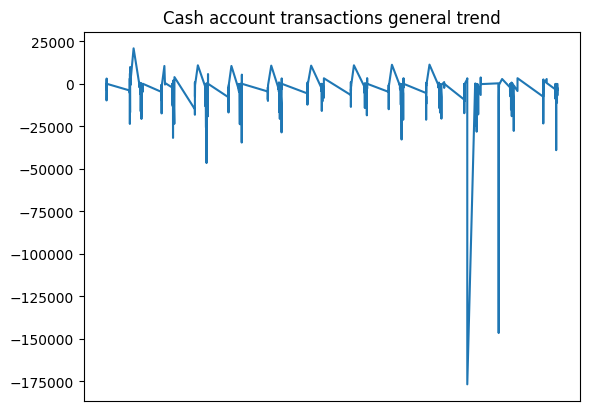

In [45]:
# Understanding cash account macro trends

cash_accounts['Entered Amount'].plot(title='Cash account transactions general trend')
plt.xticks([])

# cash account seems to be cyclical on a monthly basis
# net cash movement seems relatively stable with no upward or downward trend
# huge outlier in the 3Q of the year

In [46]:
# Cash Account transactions by month
cash_account_trends = cash_accounts
monthly = cash_account_trends.set_index('Effective Date', inplace=True)
monthly = cash_account_trends.resample('M').sum()[['Entered Amount']]
monthly

/var/folders/29/pc5613mn62d5hzwb88sv1ws40000gn/T/ipykernel_42197/1796650955.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly = cash_account_trends.resample('M').sum()[['Entered Amount']]


,Entered Amount
Effective Date,
2015-01-31,-264107.00
2015-02-28,-177191.50
2015-03-31,-285444.78
2015-04-30,-220089.33
2015-05-31,-203003.48
2015-06-30,-193428.91
2015-07-31,-148877.64
2015-08-31,-172414.32
2015-09-30,-200185.73


<AxesSubplot: title={'center': 'Aggregated Cash account transactions by month'}, xlabel='Effective Date'>

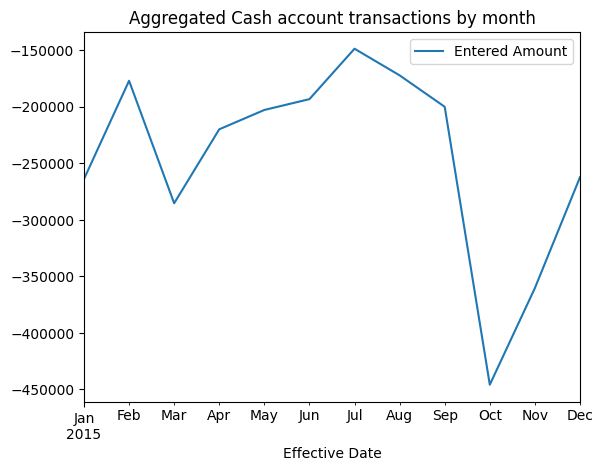

In [47]:
# Plotting cash account transactions by month to highlight anomalies
monthly.plot(title='Aggregated Cash account transactions by month')

# we might want to take a closer look at Oct transactions

In [48]:
# Anomaly Detection Model

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score

Text(0.5, 1.0, 'Cash Accounts over time')

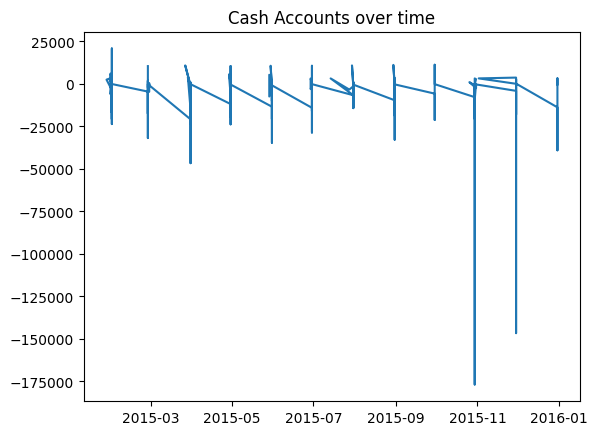

In [49]:
# plot entered amount over effective date

# reset index cashaccount
cash_accounts.reset_index(inplace=True)
plt.plot(cash_accounts['Effective Date'], cash_accounts['Entered Amount'])
plt.title('Cash Accounts over time')

# Part 3: Creating a model to identify anomalies in cash account transactions

### Problem Statement: How can we flag transactions that are out of the ordinary for the cash account using population wide analysis?

### Choice of model: Isolation Forest

![](2023-01-04-11-35-13.png)


#### How does it work?
- Isolation Forest is an unsupervised learning algorithm that is used for anomaly detection
- It is based on the idea of isolating observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature
- Random partioning produces noticeably shorter paths for anomalies
- These shorter paths in decision trees distinguish anomalies from normal observations


In [50]:
# Find Anomalies
df_cashaccount_full = cash_accounts[['Entered Amount']].copy()
anomaly_detector = IsolationForest(n_estimators=150, contamination=0.02)
df_cashaccount_full.loc[:,'anomalies'] = anomaly_detector.fit_predict(df_cashaccount_full.values)

Text(0.5, 1.0, 'Visualisation of anomalies in cash account transactions')

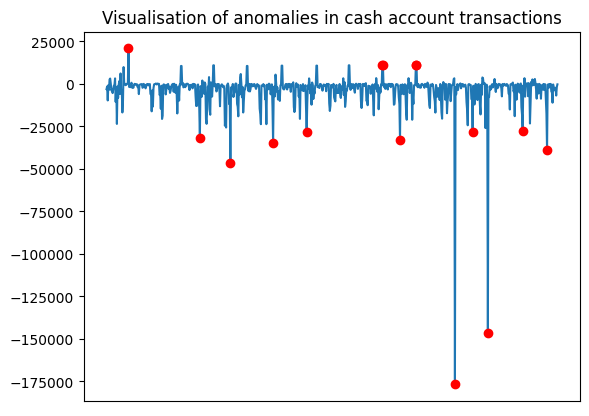

In [23]:
plt.plot(df_cashaccount_full['Entered Amount'])
df_anomaly = df_cashaccount_full.query('anomalies==-1')
plt.plot(df_anomaly['Entered Amount'], 'or')
plt.xticks([])

plt.title('Visualisation of anomalies in cash account transactions')

In [24]:
df_cashaccount_full 

,Entered Amount,anomalies
0,-3156.00,1
1,-1582.00,1
2,-9813.00,1
3,-840.00,1
4,-3562.75,1
...,...,...
735,-2317.00,1
736,-2800.00,1
737,-6934.00,1
738,-1849.00,1


In [25]:
pd.set_option('display.max_rows', None)
# show all GL rows with anomalies
GL[GL['Entered Amount'].isin(df_anomaly['Entered Amount'])]

,Account,Account Description,Product,Period Name,Name,Description,Customer/Vendor,Reference 1,Entered Currency,Entered Amount,Fx Currency,Fx Amount,Je Category,Je Line Num,Effective Date,Date Created,BLOCKed Date,Doc Sequence
2076,63103,Restricted Cash Award,0,JAN-15,Jan 15 ACCRUAL - RESTRICTED CASH AWARD ABCPAC-...,Jan 15 ACCRUAL - RESTRICTED CASH AWARD,NaN,NaN,SGD,20833.00,SGD,20833.00,All manual journal,2.0,2015-01-31,2015-02-02,2015-02-02 00:00:00,21004.0
4985,40721,Deposit + Cash,100,FEB-15,Exch Revenue_Feb 15 By Region ABCPAC-Journal V...,Feb 15 A07 Rental,NaN,NaN,SGD,-31845.00,SGD,-31845.00,All manual journal,65.0,2015-02-27,2015-03-02,2015-03-03 00:00:00,21204.0
7457,40721,Deposit + Cash,100,MAR-15,Exchange Journal ABCPAC-Journal Voucher SGD,SS Cash Acquired,NaN,NaN,SGD,-46632.00,SGD,-46632.00,All manual journal,68.0,2015-03-31,2015-04-02,2015-02-04 00:00:00,21401.0
10053,40705,InterNATIONAL Cash,100,MAY-15,Exchange Journal ABCPAC-Journal Voucher SGD,SS InterNATIONAL Exchange,NaN,NaN,SGD,-34588.00,SGD,-34588.00,All manual journal,32.0,2015-05-31,2015-06-02,2015-02-06 00:00:00,21772.0
12993,40705,InterNATIONAL Cash,100,JUN-15,Exchange Journal ABCPAC-Journal Voucher SGD,A09 SS InterNATIONAL Exchange,NaN,NaN,SGD,-28615.00,SGD,-28615.00,All manual journal,33.0,2015-06-30,2015-07-02,2015-02-07 00:00:00,21973.0
21136,63103,Restricted Cash Award,0,AUG-15,Aug 15 ACCRUAL - RESTRICTED CASH AWARD ABCPAC-...,Aug 15 ACCRUAL - RESTRICTED CASH AWARD,NaN,NaN,SGD,11175.00,SGD,11175.00,All manual journal,3.0,2015-08-30,2015-09-01,2015-01-09 00:00:00,22300.0
21137,63103,Restricted Cash Award,0,AUG-15,Aug 15 ACCRUAL - RESTRICTED CASH AWARD ABCPAC-...,Aug 15 ACCRUAL - RESTRICTED CASH AWARD,NaN,NaN,SGD,11175.00,SGD,11175.00,NaN,4.0,2015-08-30,2015-09-01,2015-01-09 00:00:00,22300.0
21848,40721,Deposit + Cash,100,AUG-15,Exchange Journal ABCPAC-Journal Voucher SGD,A07 SS Cash Acquired,NaN,NaN,SGD,-32800.00,SGD,-32800.00,All manual journal,72.0,2015-08-31,2015-09-02,2015-02-09 00:00:00,22341.0
23906,63103,Restricted Cash Award,0,SEP-15,Sep 15 ACCRUAL - RESTRICTED CASH AWARD ABCPAC-...,Sep 15 ACCRUAL - RESTRICTED CASH AWARD,NaN,NaN,SGD,11260.00,SGD,11260.00,All manual journal,3.0,2015-09-30,2015-09-30,2015-01-10 00:00:00,22453.0
23907,63103,Restricted Cash Award,0,SEP-15,Sep 15 ACCRUAL - RESTRICTED CASH AWARD ABCPAC-...,Sep 15 ACCRUAL - RESTRICTED CASH AWARD,NaN,NaN,SGD,11260.00,SGD,11260.00,NaN,4.0,2015-09-30,2015-09-30,2015-01-10 00:00:00,22453.0


In [26]:
# create fake anomalies to test model
df_cashaccount_full.loc[::3, 'Entered Amount'] += .5 * df_cashaccount_full.loc[::3, 'Entered Amount'].copy()
df_cashaccount_full.loc[::3, 'anomalies'] = -1
df_cashaccount_full.head()

,Entered Amount,anomalies
0,-4734.00,-1
1,-1582.00,1
2,-9813.00,1
3,-1260.00,-1
4,-3562.75,1


In [27]:
# Predicting anomalies

df_cashaccount_full.loc[:, 'predictions'] = anomaly_detector.predict(df_cashaccount_full[['Entered Amount']].values)
df_cashaccount_full.head()

,Entered Amount,anomalies,predictions
0,-4734.00,-1,1
1,-1582.00,1,1
2,-9813.00,1,1
3,-1260.00,-1,1
4,-3562.75,1,1


In [28]:
# F1 scores are a measure of a test's accuracy calculated from the precision and recall of the test
# 1 being the best possible score, 0 being the worst

f1_score(df_cashaccount_full['anomalies'], df_cashaccount_full['predictions'])

0.8080133555926544

# How does this fit into the audit?

Advantages: 
1. Makes population wide targeted sampling possible in a short time frame
2. Model can be trained to prescribe a threshold for anomalous transactions in real time

### Auditing of Cash and Bank Balances test of details using data analytics
- Cut-off 
    - Testing anomalies in cash disbursements at, before and after an accounting period for proper cut-off recognition
- Authorization
    - Testing anomalies in cash disbursements for proper authorization by autonomously highlighting unusually large transactions to ensure they were authorized by management
- Valuation and Allocation
    - Testing anomalies in cash disbursements for proper valuation and allocation by autonomously highlighting unusually large transactions to ensure they were properly allocated to the correct account
    - Drill down to perform extended bank reconciliation procedures and proof of cash
    - Targeted sampling of potentially overstated cash balances